In [1]:
import tensorflow as tf
import numpy as np

In [6]:
A = np.array([[1,2,3,4],
             [5,6,7,8]], dtype='float32')
A = A.reshape(1,2,4,1)

In [3]:
x = tf.keras.Input(shape = A.shape[1:])
y = tf.keras.layers.Reshape([4,2,1])(x)
z = tf.keras.layers.Permute([2,1,3])(x)

model = tf.keras.Model(inputs = x, outputs = [y,z])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 2, 4, 1)]            0         []                            
                                                                                                  
 reshape (Reshape)           (None, 4, 2, 1)              0         ['input_1[0][0]']             
                                                                                                  
 permute (Permute)           (None, 4, 2, 1)              0         ['input_1[0][0]']             
                                                                                                  
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________________________________________

In [4]:
output = model.predict(A)
print('A[0,:,:,0]= ', A[0,:,:,0])
print('output[0]= ', output[0][0,:,:,0])
print('output[1]= ', output[1][0,:,:,0])

1/1 [==============================] - 0s 64ms/step
A[0,:,:,0]=  [[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
output[0]=  [[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]
output[1]=  [[1. 5.]
 [2. 6.]
 [3. 7.]
 [4. 8.]]


In [8]:
x = tf.keras.Input(shape = A.shape[1:])
y = tf.keras.layers.UpSampling2D()(x)

u = tf.keras.layers.Reshape([8,1])(x)
z = tf.keras.layers.UpSampling1D()(u)

model = tf.keras.Model(inputs = x, outputs = [y,z])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 2, 4, 1)]            0         []                            
                                                                                                  


 reshape_3 (Reshape)         (None, 8, 1)                 0         ['input_4[0][0]']             
                                                                                                  
 up_sampling2d_2 (UpSamplin  (None, 4, 8, 1)              0         ['input_4[0][0]']             
 g2D)                                                                                             
                                                                                                  
 up_sampling1d_2 (UpSamplin  (None, 16, 1)                0         ['reshape_3[0][0]']           
 g1D)                                                                                             
                                                                                                  
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [10]:
output = model.predict(A)
print('A[0,:,:,0]= ', A[0,:,:,0])
print('output[0]= ', output[0][0,:,:,0])
print('output[1]= ', output[1][0,:,0])

1/1 [==============================] - 0s 18ms/step
A[0,:,:,0]=  [[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
output[0]=  [[1. 1. 2. 2. 3. 3. 4. 4.]
 [1. 1. 2. 2. 3. 3. 4. 4.]
 [5. 5. 6. 6. 7. 7. 8. 8.]
 [5. 5. 6. 6. 7. 7. 8. 8.]]
output[1]=  [1. 1. 2. 2. 3. 3. 4. 4. 5. 5. 6. 6. 7. 7. 8. 8.]


In [3]:
A = np.array([1,2,3,4,5]).astype('float32')
B = np.array([1,2,3,4,5,6,7,8]).astype('float32')
A = np.reshape(A, (1,-1,1))
B = np.reshape(B, (1,-1,1))

In [6]:
input_x = tf.keras.layers.Input(shape=A.shape[1:])
input_y = tf.keras.layers.Input(shape=B.shape[1:])

x = tf.keras.layers.MaxPool1D()(input_x)
y = tf.keras.layers.MaxPool1D()(input_y)

pad = y.shape[1] - x.shape[1]
x = tf.keras.layers.ZeroPadding1D(padding=(0,pad))(x)

out2 = tf.keras.layers.Add()([x,y])
out3 = tf.keras.layers.Concatenate()([x,y])

# 데이터 간의 유사도를 구할 때 많이 사용 (내적)
out4 = tf.keras.layers.Dot(axes = [1,1])([x,y])

out5 = tf.keras.layers.Dot(axes = -1)([x,y])

out_list = [x, y, out2, out3, out4, out5]
model = tf.keras.Model(inputs = [input_x, input_y], outputs = out_list)
print("model output shape: ", model.output_shape)

model output shape:  [(None, 4, 1), (None, 4, 1), (None, 4, 1), (None, 4, 2), (None, 1, 1), (None, 4, 4)]


In [7]:
output = model.predict([A,B])
for i in range(len(output)):
    print(f"output[{i}]= {output[i]}")

1/1 [==============================] - 0s 52ms/step
output[0]= [[[2.]
  [4.]
  [0.]
  [0.]]]
output[1]= [[[2.]
  [4.]
  [6.]
  [8.]]]
output[2]= [[[4.]
  [8.]
  [6.]
  [8.]]]
output[3]= [[[2. 2.]
  [4. 4.]
  [0. 6.]
  [0. 8.]]]
output[4]= [[[20.]]]
output[5]= [[[ 4.  8. 12. 16.]
  [ 8. 16. 24. 32.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]


In [3]:
A = np.array([[1,2],[3,4]], dtype='float32')
A = A.reshape(-1,2,2,1)
B = np.array([[5,6],[7,8]], dtype='float32')
B = B.reshape(-1,2,2,1)

C = np.array([1,2,3]).astype('float32')
C = C.reshape(-1,3,1,1)

In [6]:
x = tf.keras.layers.Input(shape=A.shape[1:])
y = tf.keras.layers.Input(shape=B.shape[1:])
z = tf.keras.layers.Input(shape=C.shape[1:])

out3 = tf.keras.layers.Add()([x,y])
out4 = tf.keras.layers.Concatenate()([x,y])
out5 = tf.keras.layers.Dot(axes = -1)([x,y])
out6 = tf.keras.layers.Dot(axes = -1)([x,z])

out_list = [x,y,z,out3,out4,out5,out6]
model = tf.keras.Model(inputs=[x,y,z], outputs=out_list)

print("model output shape: ", model.output_shape)

model output shape:  [(None, 2, 2, 1), (None, 2, 2, 1), (None, 3, 1, 1), (None, 2, 2, 1), (None, 2, 2, 2), (None, 2, 2, 2, 2), (None, 2, 2, 3, 1)]
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 2), dtype=tf.float32, name=None), name='concatenate_1/concat:0', description="created by layer 'concatenate_1'")


In [7]:
output = model.predict([A,B,C])
for i in range(len(output)):
    print(f"output[{i}]= {output[i]}")

1/1 [==============================] - 0s 110ms/step
output[0]= [[[[1.]
   [2.]]

  [[3.]
   [4.]]]]
output[1]= [[[[5.]
   [6.]]

  [[7.]
   [8.]]]]
output[2]= [[[[1.]]

  [[2.]]

  [[3.]]]]
output[3]= [[[[ 6.]
   [ 8.]]

  [[10.]
   [12.]]]]
output[4]= [[[[1. 5.]
   [2. 6.]]

  [[3. 7.]
   [4. 8.]]]]
output[5]= [[[[[ 5.  6.]
    [ 7.  8.]]

   [[10. 12.]
    [14. 16.]]]


  [[[15. 18.]
    [21. 24.]]

   [[20. 24.]
    [28. 32.]]]]]
output[6]= [[[[[ 1.]
    [ 2.]
    [ 3.]]

   [[ 2.]
    [ 4.]
    [ 6.]]]


  [[[ 3.]
    [ 6.]
    [ 9.]]

   [[ 4.]
    [ 8.]
    [12.]]]]]


In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [54]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)

y_and = np.array([[0],[0],[0],[1]], dtype=np.float32)
y_or = np.array([[0],[1],[1],[1]], dtype=np.float32)
y_xor = np.array([[0],[1],[1],[0]], dtype=np.float32)

In [55]:
y_and = tf.keras.utils.to_categorical(y_and)
y_or = tf.keras.utils.to_categorical(y_or)
y_xor = tf.keras.utils.to_categorical(y_xor)


In [56]:
x_and = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(units=2, activation='swish')(x_and)
# out_and = tf.keras.layers.Dense(units=1, activation='sigmoid', name='and')(x_and)
out_and = tf.keras.layers.Dense(units=2, activation='softmax', name = 'and')(x)

x_or = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(units=2, activation='swish')(x_or)
# out_or = tf.keras.layers.Dense(units=1, activation='sigmoid', name='or')(x_or)
out_or = tf.keras.layers.Dense(units=2, activation='softmax', name = 'or')(x)

x_xor = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(units=2, activation='swish')(x_xor)
out_xor = tf.keras.layers.Dense(units=2, activation='softmax', name='xor')(x)

# model = tf.keras.Model(inputs=[x_and, x_or], outputs=[out_and, out_or])
model = tf.keras.Model(inputs=[x_and, x_or, x_xor], outputs=[out_and, out_or, out_xor])
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 input_24 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 input_25 (InputLayer)       [(None, 2)]                  0         []                            
                                                                                                  
 dense_12 (Dense)            (None, 2)                    6         ['input_23[0][0]']            
                                                                                            

In [57]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

In [58]:
# ret = model.fit(x = [X,X], y = [y_and, y_or], epochs=100, batch_size=4, verbose=2)
ret = model.fit(x = [X,X,X], y = [y_and, y_or, y_xor], epochs=100, batch_size=4, verbose=0)

In [59]:
# test = model.evaluate(x = [X,X], y = [y_and, y_or], verbose=0)
test = model.evaluate(x = [X,X,X], y = [y_and, y_or, y_xor], verbose=0)
print('total loss: ', test[0])
print(f'and: loss= {test[1]}, acc= {test[4]}')
print(f'or: loss= {test[2]}, acc= {test[5]}')
print(f'xor: loss= {test[3]}, acc= {test[6]}')

total loss:  5.3209365432849154e-05
and: loss= 2.1388994355220348e-05, acc= 1.0
or: loss= 4.7614125833206344e-06, acc= 1.0
xor: loss= 2.7058958949055523e-05, acc= 1.0


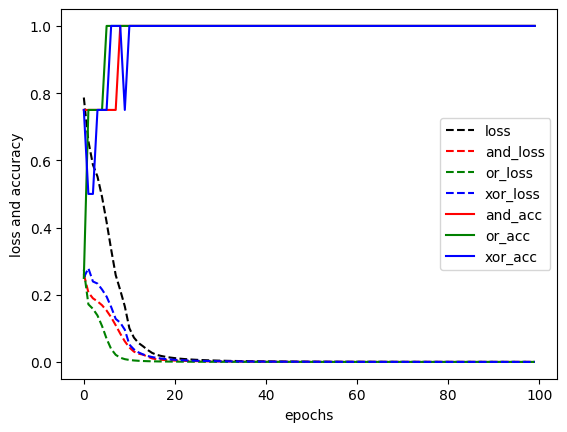

In [60]:
plt.plot(ret.history['loss'],'k--', label = 'loss')
plt.plot(ret.history['and_loss'], 'r--', label = 'and_loss')
plt.plot(ret.history['or_loss'], 'g--', label = 'or_loss')
plt.plot(ret.history['xor_loss'], 'b--', label = 'xor_loss')

plt.plot(ret.history['and_accuracy'], 'r-', label = 'and_acc')
plt.plot(ret.history['or_accuracy'], 'g-', label = 'or_acc')
plt.plot(ret.history['xor_accuracy'], 'b-', label = 'xor_acc')

plt.xlabel('epochs')
plt.ylabel('loss and accuracy')
plt.legend(loc='best')
plt.show()


In [87]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

In [95]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [96]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [97]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [98]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [99]:
def create_cnn2d(input_shape, num_class = 10):
    inputs = tf.keras.Input(shape = input_shape)
    x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Dropout(rate=0.2)(x)

    x = tf.keras.layers.Flatten()(x)

    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

model = create_cnn2d(input_shape=x_train.shape[1:])

In [100]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, verbose=1)

Epoch 1/100
150/150 [==============================] - 14s 93ms/step - loss: 0.4625 - accuracy: 0.8831
Epoch 2/100
150/150 [==============================] - 15s 101ms/step - loss: 0.0863 - accuracy: 0.9747
Epoch 3/100
150/150 [==============================] - 17s 114ms/step - loss: 0.0686 - accuracy: 0.9792
Epoch 4/100
150/150 [==============================] - 17s 111ms/step - loss: 0.0603 - accuracy: 0.9816
Epoch 5/100
150/150 [==============================] - 16s 110ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 6/100
150/150 [==============================] - 15s 103ms/step - loss: 0.0461 - accuracy: 0.9857
Epoch 7/100
150/150 [==============================] - 16s 105ms/step - loss: 0.0434 - accuracy: 0.9865
Epoch 8/100
150/150 [==============================] - 16s 108ms/step - loss: 0.0406 - accuracy: 0.9875
Epoch 9/100
150/150 [==============================] - 15s 102ms/step - loss: 0.0379 - accuracy: 0.9879
Epoch 10/100
150/150 [==============================] - 14s 94ms/

In [ ]:
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis=1), y_label)
print("confusion matrix: ", C)

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)